In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
main_df = pd.read_csv('diabetes.csv')

In [ ]:
df=main_df.copy()

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
y=df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df.drop('Outcome', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=0)

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


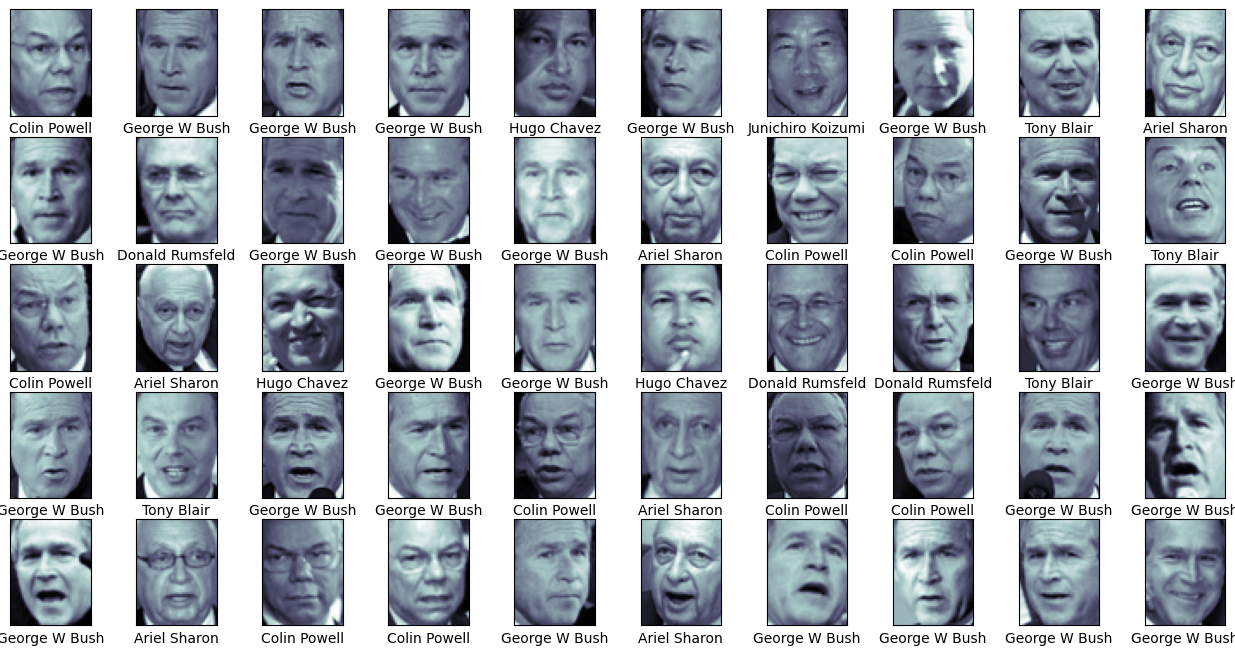

In [ ]:
fig, ax = plt.subplots(5, 10, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


In [ ]:
pca = PCA(n_components=350, whiten=True, svd_solver='randomized',random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Correct the parameter names to include the step name
param_grid = {'svc__C': [1, 2, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(x_train, y_train)
print(grid.best_params_)

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
model = grid.best_estimator_
yfit = model.predict(x_test)

In [ ]:
yfit

array([3, 4, 3, 6, 6, 1, 3, 5, 3, 1, 3, 3, 0, 3, 2, 1, 7, 2, 3, 2, 7, 3,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 2, 3, 2, 7, 3, 0, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 7, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 5, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 5, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 7, 4, 1, 3, 2, 0, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 3, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 0, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 1, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 3, 3, 7, 5, 6, 3, 7, 3,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 3, 3,
       1, 3, 4, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 4, 7, 2, 3, 1, 3, 4,
       4, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 4, 4, 3, 1, 4, 1, 0, 0, 3, 2, 0,
       4, 5, 1, 3, 3, 6, 2, 2, 3, 6, 7, 1, 1, 5, 1,

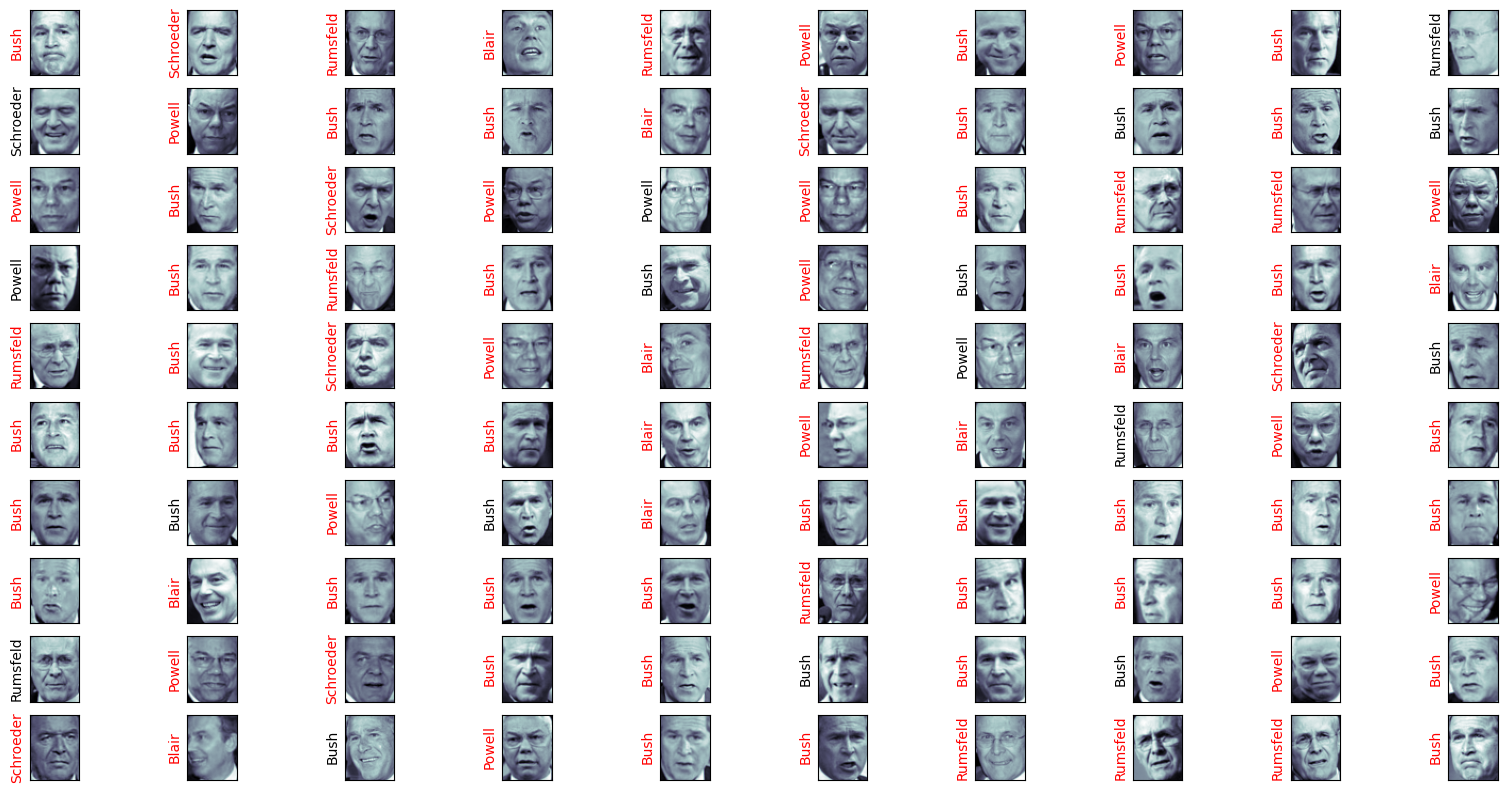

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(20, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1],
                   color='black' if yfit[i] == faces.target[i] else 'red')

In [ ]:
from sklearn.model_selection import GridSearchCV
# Correct the parameter names to include the step name
param_grid = {
    'pca__n_components': [150, 200, 250, 300], # Add PCA parameters
    'svc__C': [1, 2, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}
grid = GridSearchCV(model, param_grid)
%time grid.fit(x_train, y_train)
print(grid.best_params_)
from sklearn.metrics import classification_report
yfit = model.predict(faces.data[:len(faces.target)])
print(classification_report(faces.target, yfit, target_names=faces.target_names))
print(classification_report(y_test, yfit, target_names=faces.target_names))

CPU times: user 7min 14s, sys: 1min 52s, total: 9min 6s
Wall time: 5min 54s
{'pca__n_components': 150, 'svc__C': 1, 'svc__gamma': 0.005}


AttributeError: 'PCA' object has no attribute 'components_'